In [1]:
%cd AI/BCI/muse/P300
import pandas as pd

C:\Users\Viacheslav_Bobrov\AI\BCI\muse\P300


In [2]:
%matplotlib inline

time_df = pd.read_csv('data/2019-07-12-20.57.11_v_signal_timestamps_1_20sec.csv')
eeg_df = pd.read_csv('data/2019-07-12-20.57.11_recording_1_20sec.csv')
electrode_names = ['TP9', 'AF7', 'AF8', 'TP10']
print(time_df.head())
print(eeg_df.head())

   Unnamed: 0             0
0           0  1.562965e+09
1           1  1.562965e+09
2           2  1.562965e+09
     timestamps     TP9     AF7     AF8    TP10  Right AUX
0  1.562965e+09  -5.859  46.387  45.410 -14.160     51.270
1  1.562965e+09  16.113  48.340  35.156  11.719     11.230
2  1.562965e+09  46.875  47.852  20.020  52.246     25.391
3  1.562965e+09  36.133  37.598  22.949  40.527     51.270
4  1.562965e+09  10.742  12.695  36.133  19.043     46.875


In [3]:
odd_signal_timestamps = time_df['0'].values.reshape((-1, 1))
eeg_timestamps = eeg_df['timestamps'].values.reshape((-1, 1))
n_signals = len(odd_signal_timestamps)
print(eeg_timestamps.shape)
n_signals


(4956, 1)


3

In [4]:
import scipy.spatial

# A tree optimized for nearest-neighbor lookup
tree = scipy.spatial.cKDTree(eeg_timestamps)

# The distances from the elements of array2 to their nearest neighbors in
# array1, and the indices of those neighbors.
distances, indices = tree.query(odd_signal_timestamps)

indices

array([0, 0, 0], dtype=int32)

4.301999807357788
4.2870001792907715
4.300999879837036


4.2799999713897705
4.307000160217285


4.301000118255615
4.299999952316284


4.299999952316284
4.299999952316284
4.302000045776367


4.288000106811523
4.299999952316284
4.301000118255615


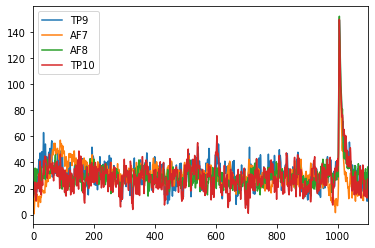

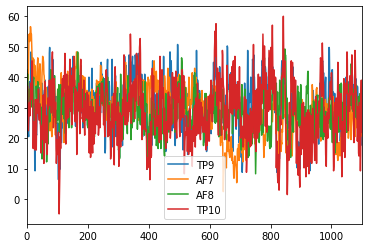

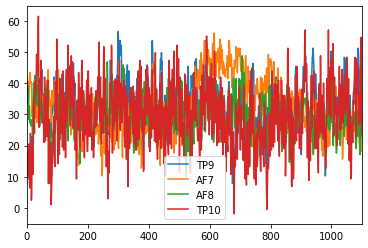

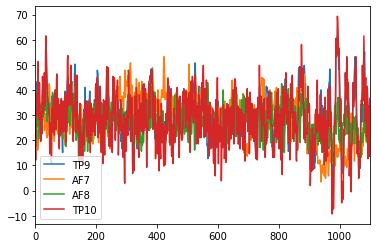

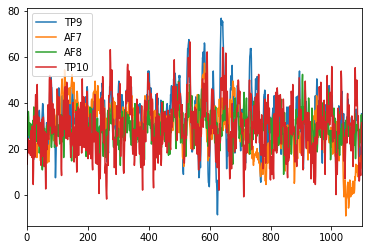

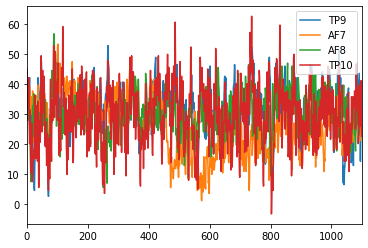

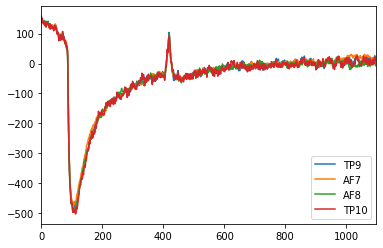

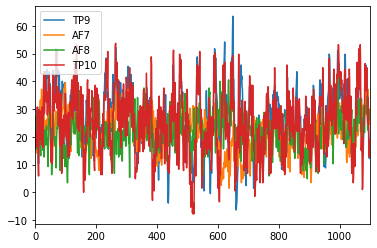

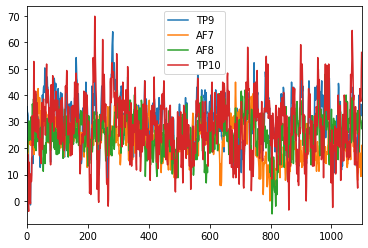

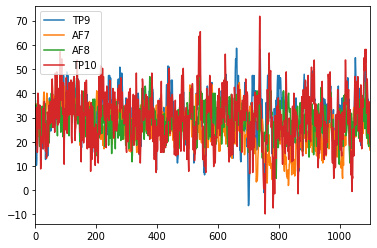

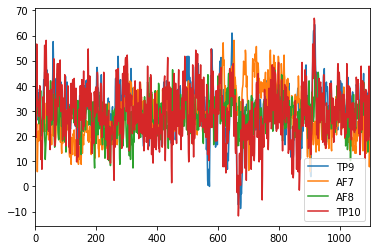

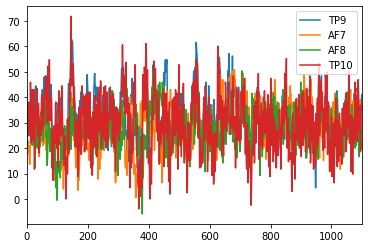

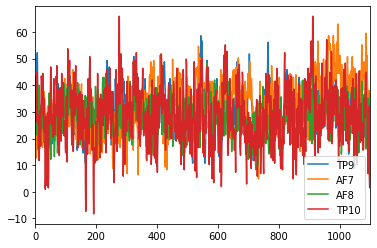

In [30]:
episode_dfs = []
for i in range(n_signals):
    episode_df = eeg_df.iloc[indices[i] - 100:indices[i] + 1000].reset_index()
    print(episode_df['timestamps'].iloc[-1] - episode_df['timestamps'].iloc[0])
    episode_dfs.append(episode_df)
    episode_df[electrode_names].plot()


In [33]:
import numpy as np

episode_dfs = episode_dfs[:-1]
n_picked_signals = len(episode_dfs)

tp9_episodes = np.zeros((n_picked_signals, 1100))
af7_episodes = np.zeros((n_picked_signals, 1100))
af8_episodes = np.zeros((n_picked_signals, 1100))
tp10_episodes = np.zeros((n_picked_signals, 1100))
for i in range(n_picked_signals):
    tp9_episodes[i] = episode_dfs[i]['TP9'].values
    af7_episodes[i] = episode_dfs[i]['AF7'].values
    af8_episodes[i] = episode_dfs[i]['AF8'].values
    tp10_episodes[i] = episode_dfs[i]['TP10'].values


Text(0.5, 1.0, 'TP10')

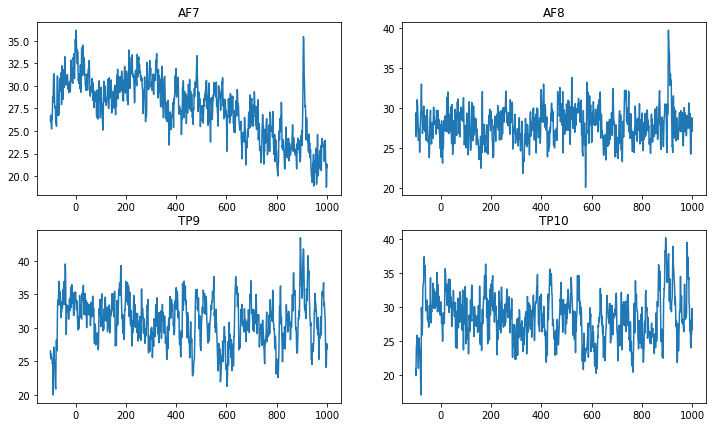

In [34]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(2, 2, figsize=(12, 7))
time_axis = np.linspace(-100, 1000,1100)
axs[0, 0].plot(time_axis,np.squeeze(np.mean(af7_episodes, axis=0)))
axs[0, 0].set_title("AF7")
axs[0, 1].plot(time_axis,np.squeeze(np.mean(af8_episodes, axis=0)))
axs[0, 1].set_title("AF8")
axs[1, 0].plot(time_axis,np.squeeze(np.mean(tp9_episodes, axis=0)))
axs[1, 0].set_title("TP9")
axs[1, 1].plot(time_axis,np.squeeze(np.mean(tp10_episodes, axis=0)))
axs[1, 1].set_title("TP10")
